# Ahmedabad Restaurant Data analysis

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Overview of the data

In [4]:
data = pd.read_csv('zomato_restaurants_in_India.csv')

In [11]:
# We only want data of Ahmedabad & Gandhinagar
data = data[(data.city=="Ahmedabad")]
data.shape

(1247, 26)

In [12]:
data.head()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
2622,18757684,Ph Se Food,['Casual Dining'],https://www.zomato.com/ahmedabad/ph-se-food-bo...,"205-206, Silve Radiance, Sindhu Bhawan Road, P...",Ahmedabad,11,Bodakdev,23.038755,72.510887,...,3,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Cred...",4.5,Excellent,1434,773,0.0,-1,-1
2623,18658177,Millhouse,['Casual Dining'],https://www.zomato.com/ahmedabad/millhouse-1-v...,"3rd Floor, Alpha One Mall, Vastrapur, Ahmedabad",Ahmedabad,11,"Ahmedabad One Mall, Vastrapur",23.039770,72.531508,...,3,Rs.,"['No Alcohol Available', 'Debit Card', 'Credit...",4.5,Excellent,1530,768,0.0,-1,-1
2624,18663856,The Red Bistro,['Casual Dining'],https://www.zomato.com/ahmedabad/the-red-bistr...,"Armeida, Sindhu Bhavan Road, Off SG Road, Boda...",Ahmedabad,11,Bodakdev,23.039852,72.509181,...,3,Rs.,"['Lunch', 'Delivery', 'Debit Card', 'Dinner', ...",4.6,Excellent,695,631,0.0,-1,-1
2625,18819827,Kadak Bhagat,['Casual Dining'],https://www.zomato.com/ahmedabad/kadak-bhagat-...,"1, First Floor, Dev Aurum Complex, Deer Cirle,...",Ahmedabad,11,Prahlad Nagar,23.012411,72.514392,...,3,Rs.,"['Credit Card', 'Dinner', 'Cash', 'Debit Card'...",4.4,Very Good,977,188,0.0,1,-1
2626,18718880,Urban Khichdi,['Casual Dining'],https://www.zomato.com/ahmedabad/urban-khichdi...,"A -103, Shivalik Plaza, Opposite AMA, IIM Road...",Ahmedabad,11,Vastrapur,23.028315,72.542458,...,2,Rs.,"['Dinner', 'Delivery', 'Debit Card', 'Lunch', ...",4.7,Excellent,619,305,0.0,1,-1


# Preprocessing

# Remover duplicate entries

In [13]:
# Checking for redundant data
data["res_id"].nunique()

1247

We can see that most of data is redundant 👯‍♂️
Our next step will be to remove this data redundancy

In [14]:
data.drop_duplicates(["res_id"],keep='first',inplace=True)
data.shape

(1247, 26)

In [15]:
data.set_index("res_id",inplace=True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1247 entries, 18757684 to 18733569
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  1247 non-null   object 
 1   establishment         1247 non-null   object 
 2   url                   1247 non-null   object 
 3   address               1247 non-null   object 
 4   city                  1247 non-null   object 
 5   city_id               1247 non-null   int64  
 6   locality              1247 non-null   object 
 7   latitude              1247 non-null   float64
 8   longitude             1247 non-null   float64
 9   zipcode               418 non-null    object 
 10  country_id            1247 non-null   int64  
 11  locality_verbose      1247 non-null   object 
 12  cuisines              1247 non-null   object 
 13  timings               1245 non-null   object 
 14  average_cost_for_two  1247 non-null   int64  
 15  price_range    

In [17]:
data.describe()

,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway
count,1247.0,1247.000000,1247.000000,1247.0,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,1245.0,1247.000000,1247.0
mean,11.0,22.966804,72.373118,1.0,492.750601,1.798717,3.209623,274.567763,138.901363,0.0,-0.639134,-1.0
std,0.0,1.303760,3.555803,0.0,377.312310,0.809493,1.363166,402.204391,261.323767,0.0,0.769404,0.0
min,11.0,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,-1.000000,-1.0
25%,11.0,23.020958,72.512466,1.0,250.000000,1.000000,3.100000,18.000000,6.000000,0.0,-1.000000,-1.0
50%,11.0,23.037244,72.538939,1.0,400.000000,2.000000,3.700000,100.000000,37.000000,0.0,-1.000000,-1.0
75%,11.0,23.047979,72.569938,1.0,600.000000,2.000000,4.000000,389.500000,156.000000,0.0,-1.000000,-1.0
max,11.0,23.180380,72.684973,1.0,2500.000000,4.000000,4.900000,3610.000000,3403.000000,0.0,1.000000,-1.0


# Exploratory Data Analysis (EDA)

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [20]:
data.drop_duplicates(inplace=True)
data.dropna(inplace=True)

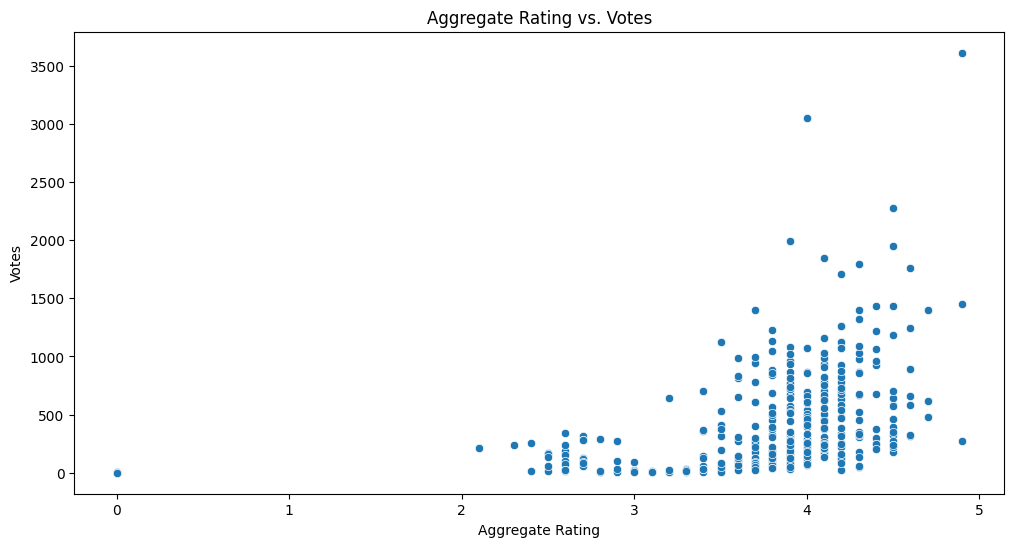

In [24]:
# Bivariate analysis
plt.figure(figsize=(12, 6))
sns.scatterplot(x='aggregate_rating', y='votes', data=data)
plt.title('Aggregate Rating vs. Votes')
plt.xlabel('Aggregate Rating')
plt.ylabel('Votes')
plt.show()

# Top 10 Restaurants in Ahmedabad (in #Outlets)

Text(0.5, 1.0, 'Top 10 Restaurants of Ahmedabad')

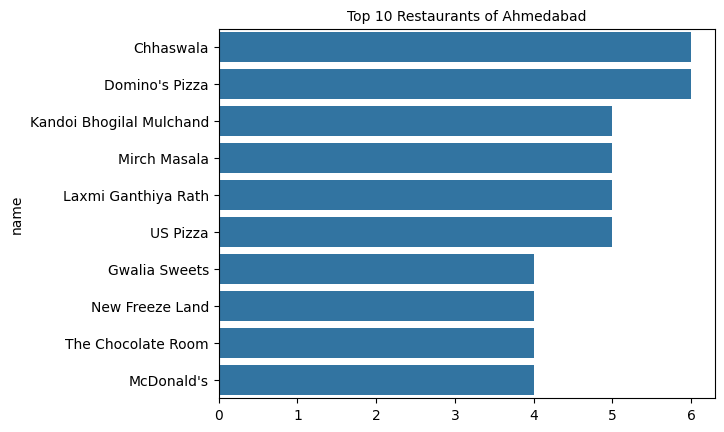

In [28]:
#plt.figure(figsize=(35,15))
#plt.figure(figsize=(8,8))
sns.barplot(y=(data[data["city"]=="Ahmedabad"]["name"].value_counts()).index[:10],x=(data[data["city"]=="Ahmedabad"]["name"].value_counts()).values[:10])
plt.title("Top 10 Restaurants of Ahmedabad",fontsize=10)

# Types of restuarant in Ahmedabad

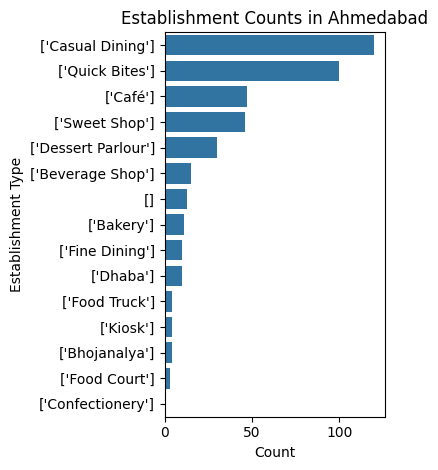

In [31]:
# Using seaborn's countplot for a clearer representation
plt.subplot(1, 2, 1)
sns.countplot(y="establishment", data=Ahmedabad, order=Ahmedabad["establishment"].value_counts().index)
plt.title("Establishment Counts in Ahmedabad")
plt.xlabel("Count")
plt.ylabel("Establishment Type")

plt.tight_layout()
plt.show()

In [32]:
# We only want the area (Ex: not "SBR Social, Bodakdev" but Bodakdev)
test = Ahmedabad.copy()
for i in test.index:
    test.loc[i,"locality"] = str(test.loc[i,"locality"]).split(', ')[-1] if str(test.loc[i,"locality"]).split(', ')[-1] != 'Gandhinagar' else str(test.loc[i,"locality"]).split(', ')[-2]
test["locality"].value_counts().index

Index(['Bodakdev', 'Navrangpura', 'Vastrapur', 'Satellite', 'Chandkheda',
       'Prahlad Nagar', 'C G Road', 'Mani Nagar', 'Thaltej', 'Naranpura',
       'Gurukul', 'Ashram Road', 'Bhadra', 'Ellis Bridge', 'Paldi', 'Ambavadi',
       'Shahibagh', 'Memnagar', 'Gota', 'Sola', 'Lal Darwaja', 'Kankaria',
       'Bopal', 'Manek Chowk', 'Rakhial', 'Kalupur', 'Ranip', 'Sabarmati',
       'Relief Road', 'Jamalpur', 'Adalaj', 'Bapunagar', 'Hansol', 'Vejalpur',
       'Gulbai Tekra', 'Subhash Bridge', 'Sarkhej', 'Ghatlodia',
       'Prahladnagar', 'Nikol', 'Naroda', 'Vastral', 'The Metropole Hotel',
       'Food Truck Park', 'Ellisbridge', 'Odhav', 'Chandlodia', 'Shahpur',
       'Vasna', 'Swapneel 5'],
      dtype='object', name='locality')

In [33]:
Ahmedabad = test.copy()

Text(0.5, 1.0, '#Restaurants in each Area (Ahmedabad)')

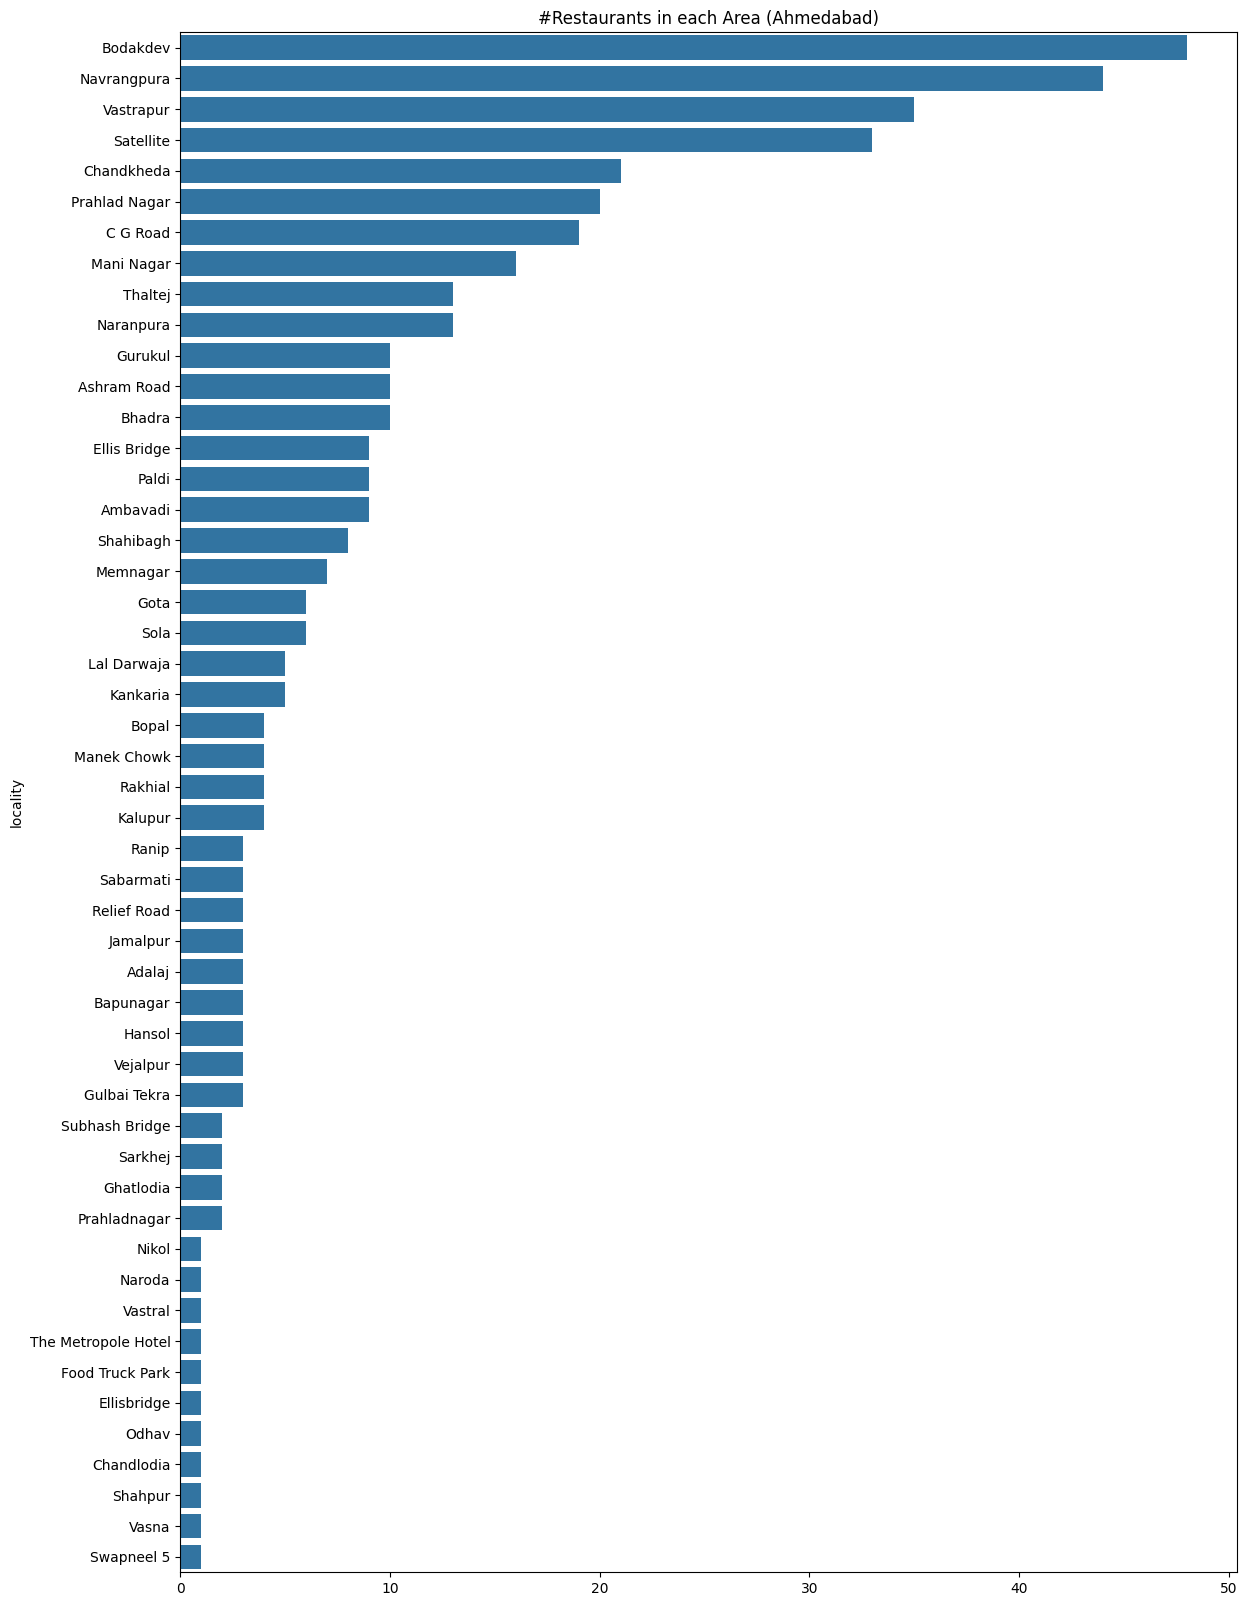

In [34]:
plt.figure(figsize=(30,20))
plt.subplot(1,2,1)
sns.barplot(x=Ahmedabad['locality'].value_counts().values,y=Ahmedabad['locality'].value_counts().index)
plt.title("#Restaurants in each Area (Ahmedabad)")

# Most available Cuisines in Ahmedabad

In [35]:
Ahmedabad['cuisines'].value_counts()[:10]

cuisines
Street Food              26
North Indian             21
Mithai                   19
Pizza, Fast Food         15
Cafe                     13
North Indian, Chinese    12
Mithai, Street Food      11
Fast Food                11
Beverages                11
Gujarati                  9
Name: count, dtype: int64

In [36]:
# To see which cuisines are higher in counts, we will make a map to count values
test = Ahmedabad.copy()
Cuisines_Count = {}
for cuisines in test['cuisines']:
    for c in str(cuisines).split(', '):
        if c in Cuisines_Count:
            Cuisines_Count[c] = Cuisines_Count[c] + 1
        else:
            Cuisines_Count[c] = 1

In [37]:
sortedC = sorted(Cuisines_Count.items(),key=lambda kv:kv[1])[::-1]
import collections
Cuisines_Count = collections.OrderedDict(sortedC)

Text(0.5, 1.0, '10 most available(more preferable) Cuisines in Ahmedabad')

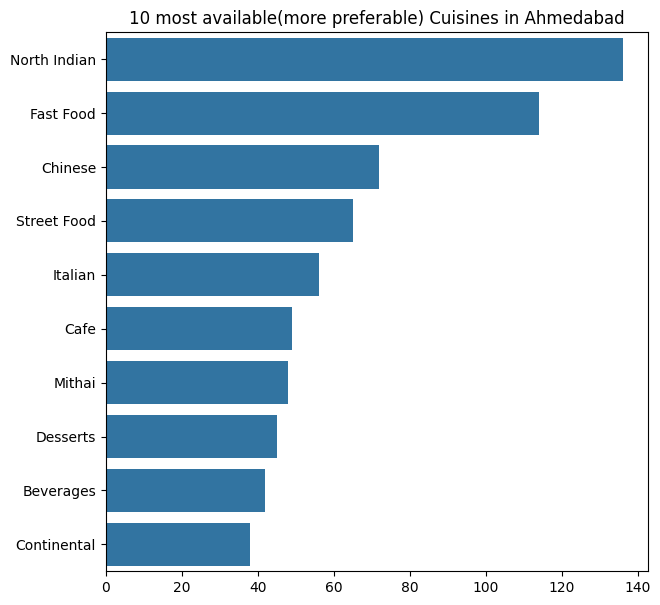

In [39]:
Cuisines_Count_A = Cuisines_Count
plt.figure(figsize=(7,7))
sns.barplot(y=[str(x) for x in Cuisines_Count.keys()][:10],x=[int(x) for x in Cuisines_Count.values()][:10])
plt.title("10 most available(more preferable) Cuisines in Ahmedabad")

# Average Cost for two persons

In [40]:
data["average_cost_for_two"].describe()

count     418.000000
mean      551.913876
std       403.421425
min        50.000000
25%       262.500000
50%       500.000000
75%       700.000000
max      2500.000000
Name: average_cost_for_two, dtype: float64

Text(0.5, 1.0, 'Average cost for 2 (Ahmedabad)')

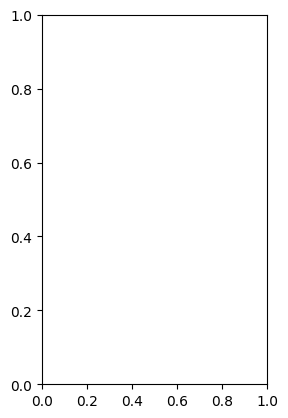

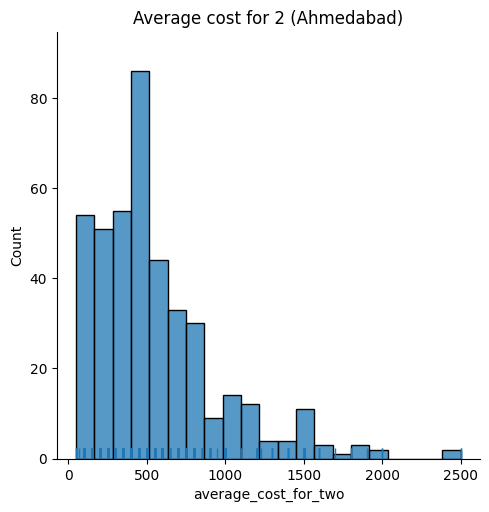

In [50]:
plt.subplot(1,2,2)
sns.displot(data[data["city"]=="Ahmedabad"]["average_cost_for_two"],rug=True)
plt.title("Average cost for 2 (Ahmedabad)")

# Average Cost for each Establishment type

Text(0.5, 1.0, 'Average cost for two per Establishment (Ahmedabad)')

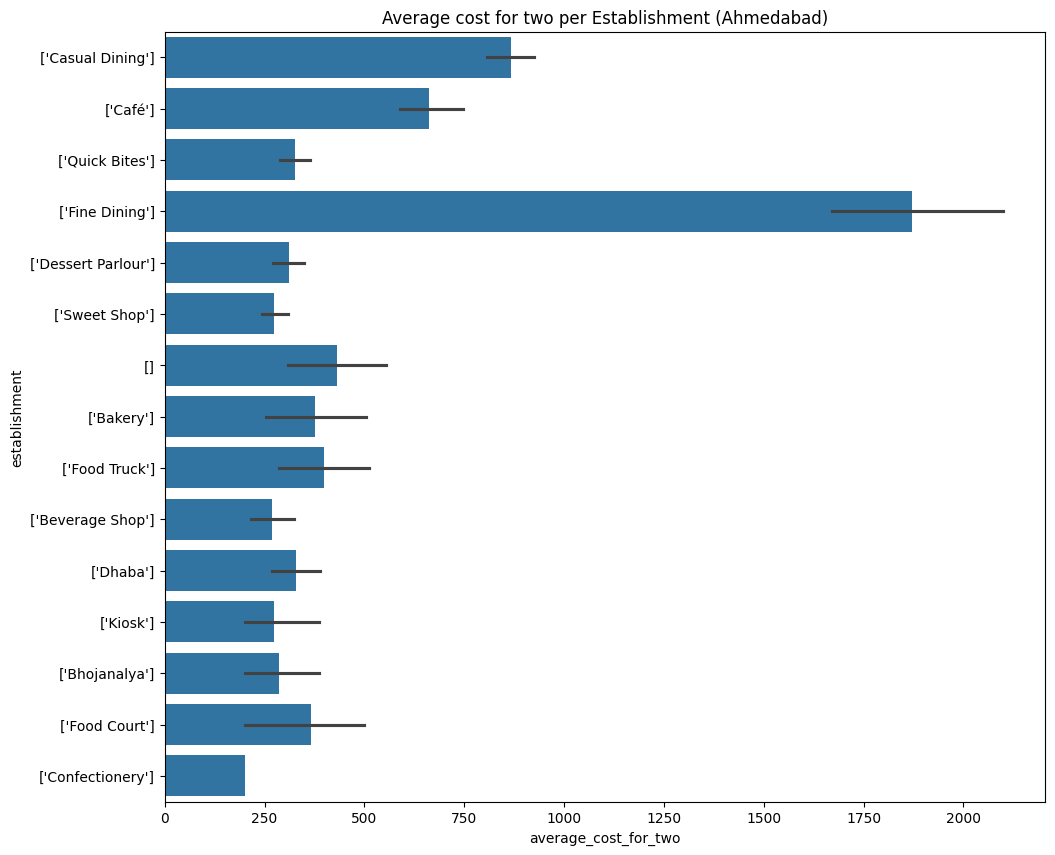

In [51]:
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
sns.barplot(y="establishment",x="average_cost_for_two",data=Ahmedabad)
plt.title("Average cost for two per Establishment (Ahmedabad)")

# Average cost per locality

Text(0.5, 1.0, 'Average cost per Locality (Ahmedabad)')

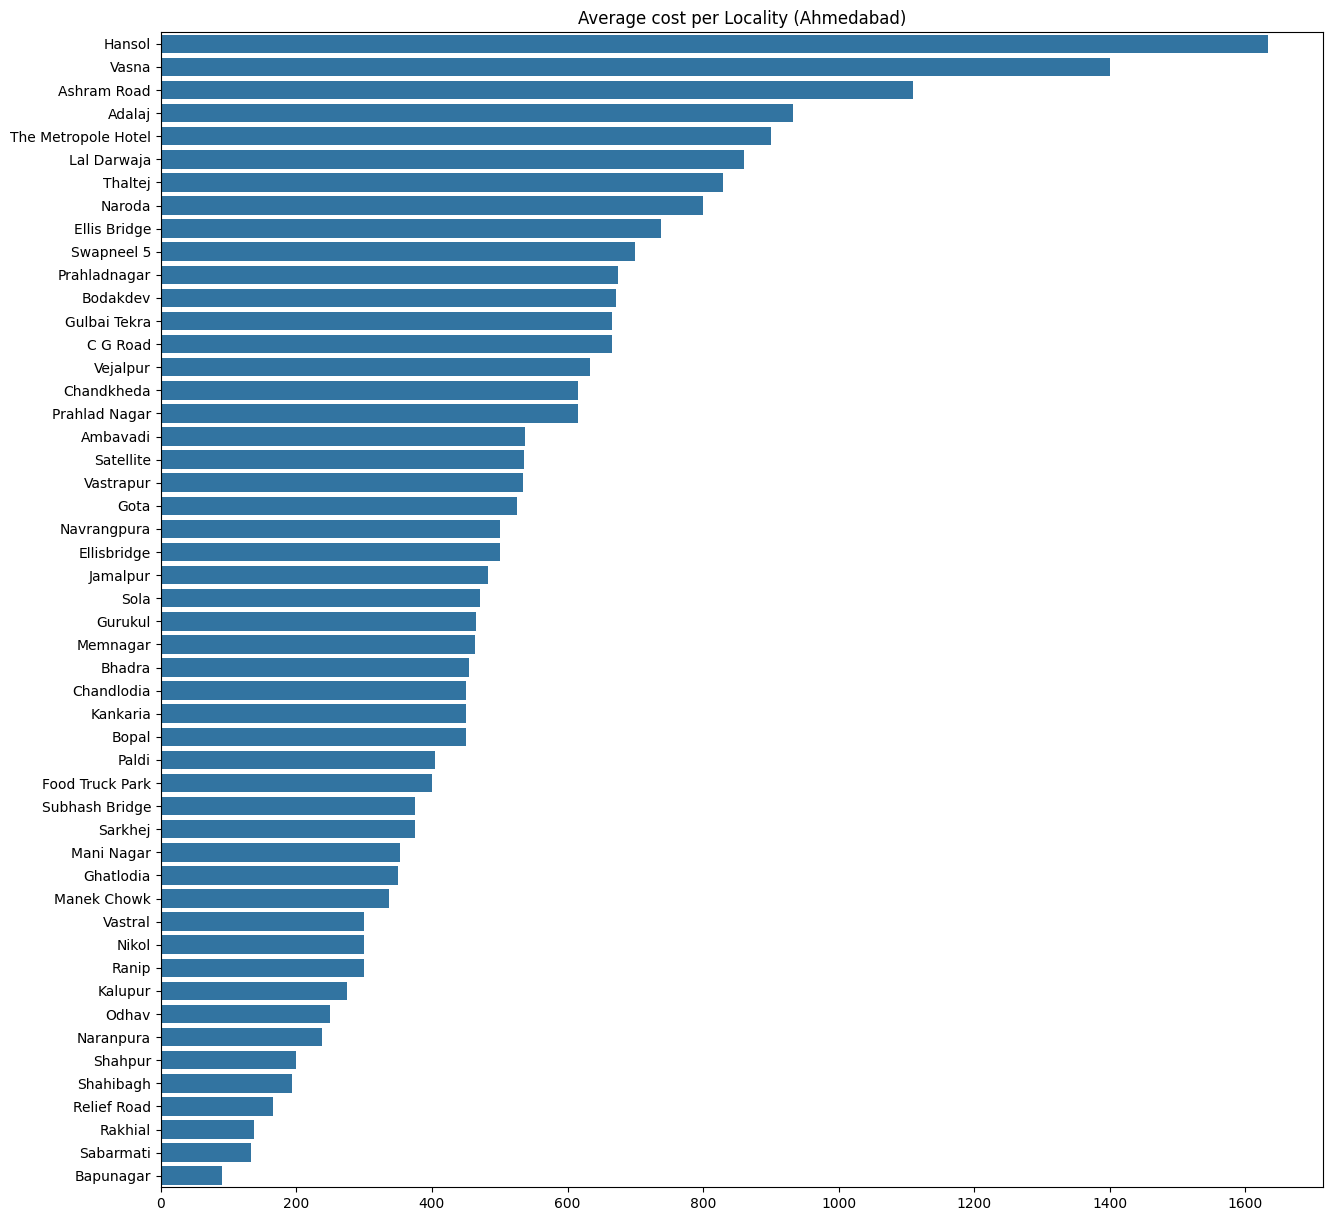

In [52]:
# Finding Locality wise average cost in Ahmedabad
localityXAvgCost_A = {}
for loc in Ahmedabad["locality"].unique():
    localityXAvgCost_A[loc] = Ahmedabad[Ahmedabad["locality"]==loc]["average_cost_for_two"].mean()
# Sorting Dictionary
sorted_LA_A = sorted(localityXAvgCost_A.items(),key=lambda kv:kv[1])[::-1]
localityXAvgCost_A = collections.OrderedDict(sorted_LA_A)

plt.figure(figsize=(15,15))
sns.barplot(y=[str(x) for x in localityXAvgCost_A.keys()],x=[int(x) for x in localityXAvgCost_A.values()])
plt.title("Average cost per Locality (Ahmedabad)")

# Top Highlights of Restaurants

In [53]:
# Plots top 20(default) highlights of a City
def Highlights(data,city,top=20):    
    highlight_Counts = {}
    for highlights in data["highlights"]:
        for highlight in str(highlights).split(', '):
            if highlight[0]=='[':
                highlight = highlight[1:]
            if highlight[-1]==']':
                highlight = highlight[:-1]

            if highlight in highlight_Counts:
                highlight_Counts[highlight] += 1
            else:
                highlight_Counts[highlight] = 1

    sorted_highlights_a = sorted(highlight_Counts.items(),key= lambda x : x[1])[::-1]
    highlight_Counts = collections.OrderedDict(sorted_highlights_a)

    plt.figure(figsize=(10,10))
    sns.barplot(y=[str(x) for x in highlight_Counts.keys()][:top],x=[int(x) for x in highlight_Counts.values()][:top])
    plt.title("Top " +str(top) + " Highlights of Restaurants in " + city)
    
    return highlight_Counts

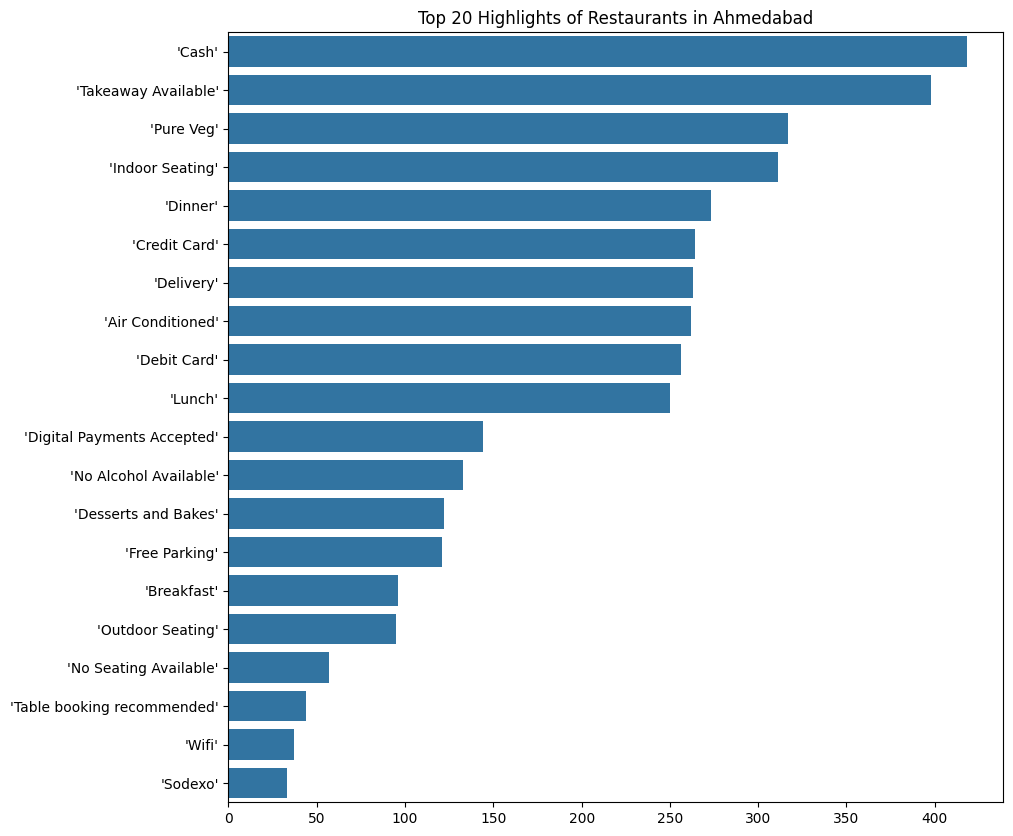

In [54]:
highlights_Ahmedabad = Highlights(Ahmedabad,"Ahmedabad")

# Digital Payments

As people are moving towards cash less system, let's see how many Restaurants accepts digital payments
It could be credit card, debit card or any other digital payment method

Text(0.5, 1.0, 'Digital Payment (Ahmedabad)')

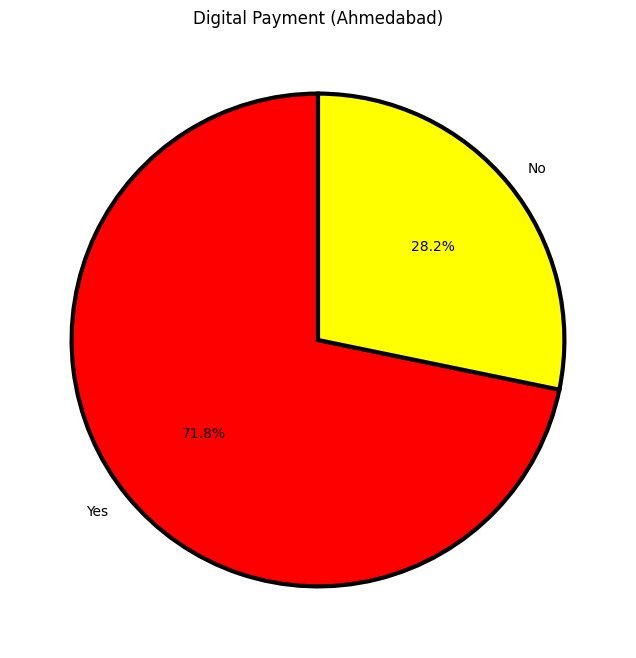

In [56]:
total_res_A = Ahmedabad.shape[0]
Digital_Payments_A = 0 

for highlights in Ahmedabad["highlights"]:
    if "'Digital Payments Accepted'" in str(highlights).split(', '):
        Digital_Payments_A +=1
    elif "'Credit Card'" in str(highlights).split(', '):
        Digital_Payments_A +=1
    elif "'Debit Card'" in str(highlights).split(', '):
        Digital_Payments_A +=1
    elif "'Sodexo'" in str(highlights).split(', '):
        Digital_Payments_A +=1


# Data to plot
labels = ["Yes","No"]
sizes = [Digital_Payments_A,total_res_A-Digital_Payments_A]

# Plot
plt.figure(figsize=(8,8))
plt.pie(sizes,labels=labels,startangle=90,autopct='%.1f%%',colors=["red","yellow"],wedgeprops={ 'linewidth' : 3,'edgecolor' : "black" })
plt.title("Digital Payment (Ahmedabad)")

Here we can more than 70% of the Restaurants have Digital Payment option in Ahmedabad

# Delivery service

Text(0.5, 1.0, 'Delivery (Ahmedabad)')

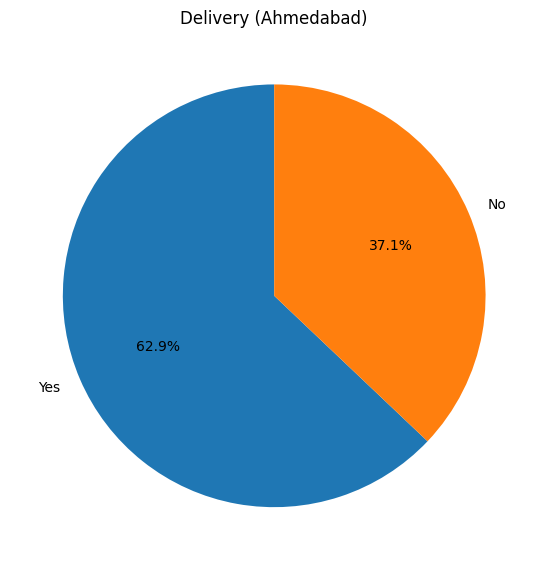

In [58]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.pie([highlights_Ahmedabad["'Delivery'"],total_res_A-highlights_Ahmedabad["'Delivery'"]],
       startangle=90,autopct='%.1f%%',
       labels=["Yes","No"])
plt.title("Delivery (Ahmedabad)")

# Aggregate rating, Rating text, Votes count Analysis

C:\Users\Admin\AppData\Local\Temp\ipykernel_13776\803987710.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Ahmedabad["aggregate_rating"])


(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.]),
 [Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100'),
  Text(120.0, 0, '120'),
  Text(140.0, 0, '140'),
  Text(160.0, 0, '160'),
  Text(180.0, 0, '180')])

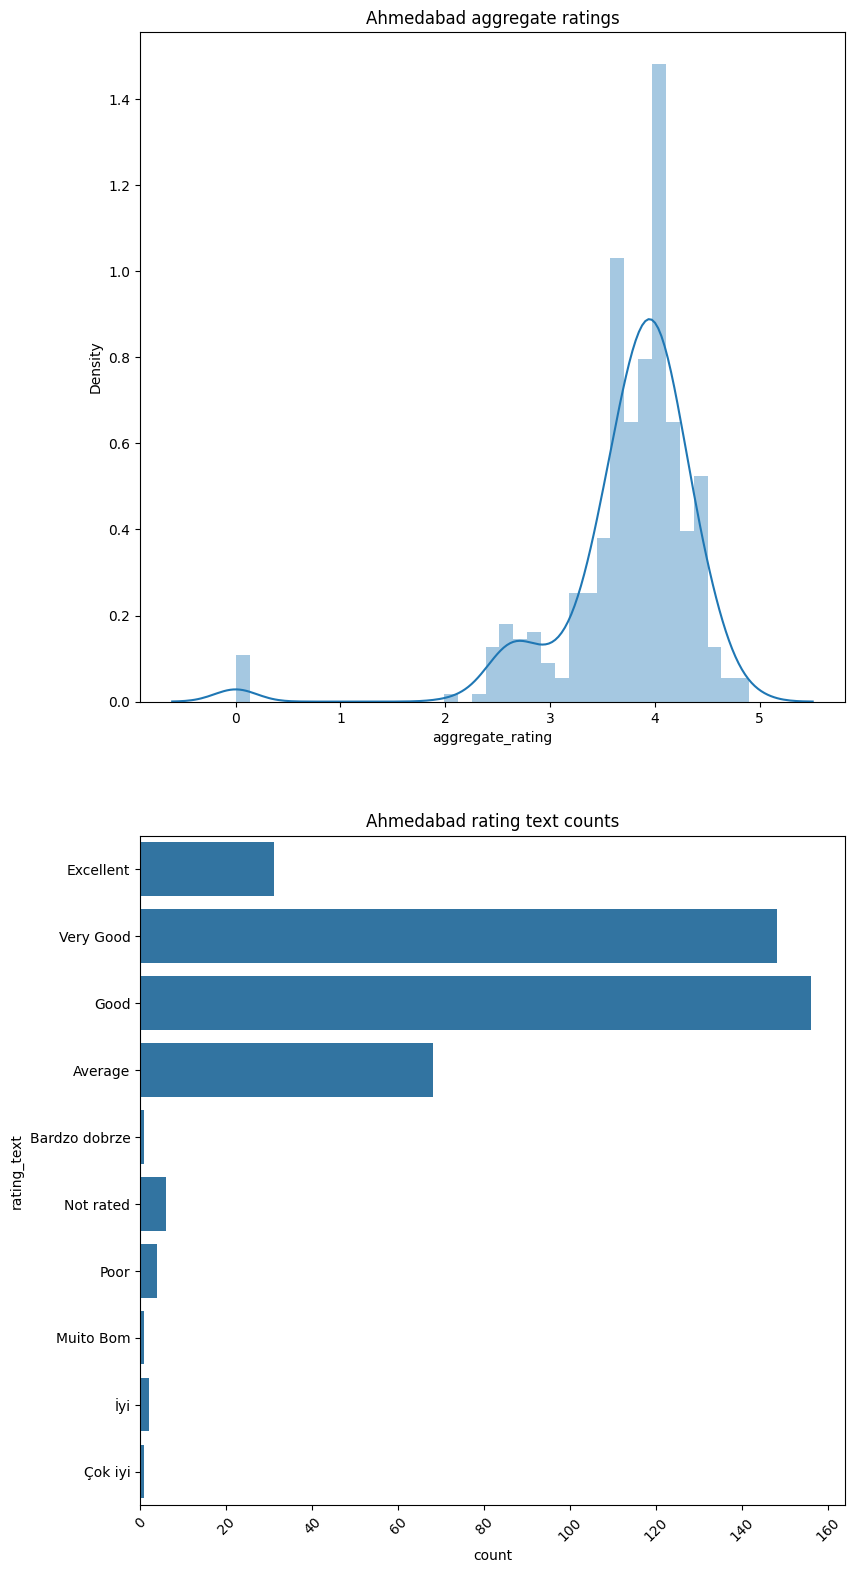

In [64]:
plt.figure(figsize=(20,40))

plt.subplot(4,2,1)
sns.distplot(Ahmedabad["aggregate_rating"])
plt.title("Ahmedabad aggregate ratings")

plt.subplot(4,2,3)
sns.countplot(Ahmedabad["rating_text"])
plt.title("Ahmedabad rating text counts")
plt.xticks(rotation=45)

Most of ratings are around 3.5-4 in most of the restaurants in both of the cities
Number of Restaurants with "Good" & "Very Good" ratings are more in Ahmedabad

# Which are the top Restaurants in Ahmedabad?

I have created a Function to find and plot top Restaurants

In [65]:
def BestRestaurants(city,esta):
    data = city[city["establishment"]==esta]["name"].value_counts()[:10]
    ratings = {}
    #print(data.index.values)
    for name in data.index.values:
        ratings[name] = city[(city["establishment"]==esta) & (city["name"]==name)]["aggregate_rating"].mean()
    #print(ratings)
    sorted_ratings = sorted(ratings.items(),key=lambda x:x[1])[::-1]
    ratings = collections.OrderedDict(sorted_ratings)
    #print(ratings)
    plt.figure(figsize=(8,8))
    sns.barplot(y=[str(x) for x in ratings.keys()],x=[float(x) for x in ratings.values()])
    plt.title("Top 10 " + esta + " Restaurants in " + str(city["city"].values[0]))
    plt.xlabel("Average Ratings")
    plt.ylabel("Restaurant Names")

# Top Quick Bites Restaurants in Ahmedabad

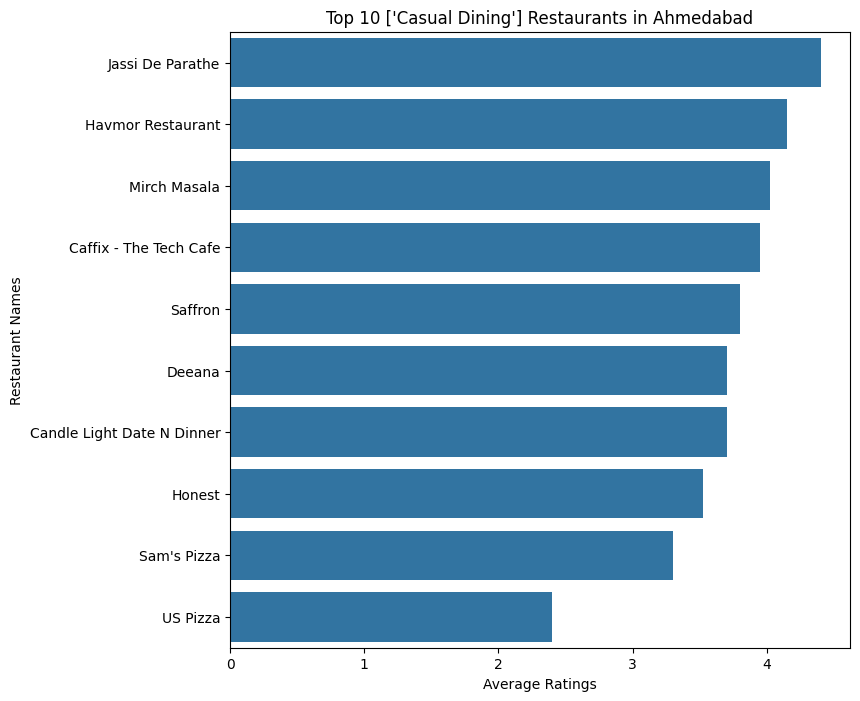

In [66]:
BestRestaurants(Ahmedabad,"['Casual Dining']")

# Top Cafes in Ahmedabad

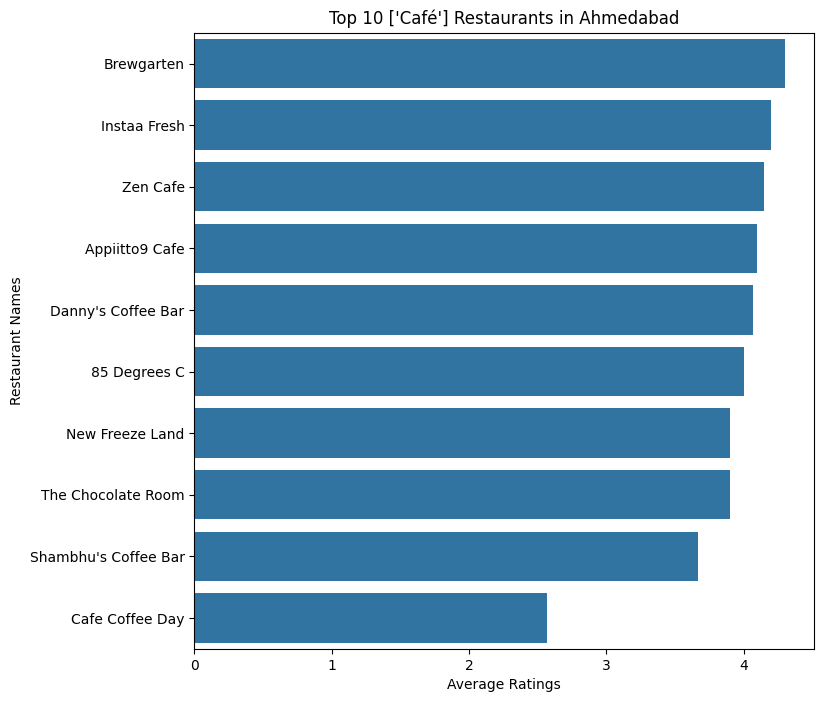

In [67]:
BestRestaurants(Ahmedabad,"['Café']")

# Top Dessert Parlours in Ahmedabad

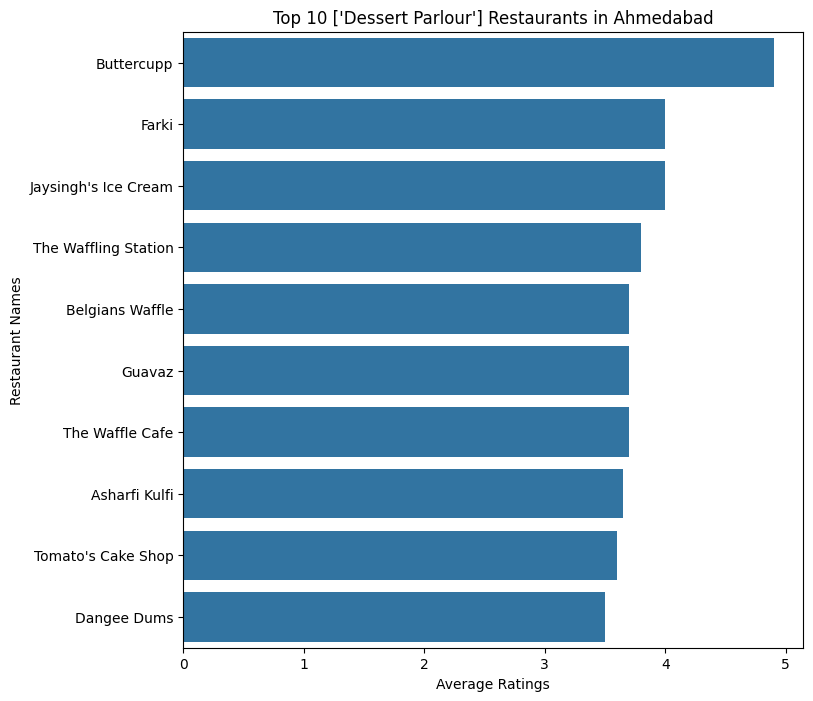

In [68]:
BestRestaurants(Ahmedabad,"['Dessert Parlour']")

# Locality & Cuisine wise Top Restaurants

I have developed a function to do this!!

In [70]:
from statistics import mean
def BestRestaurantsLocal(city,locality,cuisine):
    data = city[city["locality"]==locality]
    ratings = {}
    #print(data.index.values)
    for i in data.index.values:
        if cuisine in str(data.loc[i,"cuisines"]).split(', '):
            if data.loc[i,"name"] not in ratings:
                ratings[data.loc[i,"name"]] = [data.loc[i,"aggregate_rating"]]
            else:
                ratings[data.loc[i,"name"]].append(data.loc[i,"aggregate_rating"])
    for r in ratings.keys():
        ratings[str(r)] = mean(ratings[str(r)])
    sorted_ratings = sorted(ratings.items(),key=lambda x:x[1])[::-1]
    ratings = collections.OrderedDict(sorted_ratings)
    #print(ratings)
    plt.figure(figsize=(8,8))
    if len(ratings)>10:
        sns.barplot(y=[str(x) for x in ratings.keys()][:10],x=[float(x) for x in ratings.values()][:10])
        #plt.title("Top 10 " + cuisine + " Restaurants in " + locality)
        #plt.xlabel("Average Ratings")
        #plt.ylabel("Restaurant Names")
    else:
        sns.barplot(y=[str(x) for x in ratings.keys()],x=[float(x) for x in ratings.values()])
    plt.title("Top 10 " + cuisine + " Restaurants in " + locality)
    plt.xlabel("Average Ratings")
    plt.ylabel("Restaurant Names")

# Top North Indian Restaurants in Bodakdev

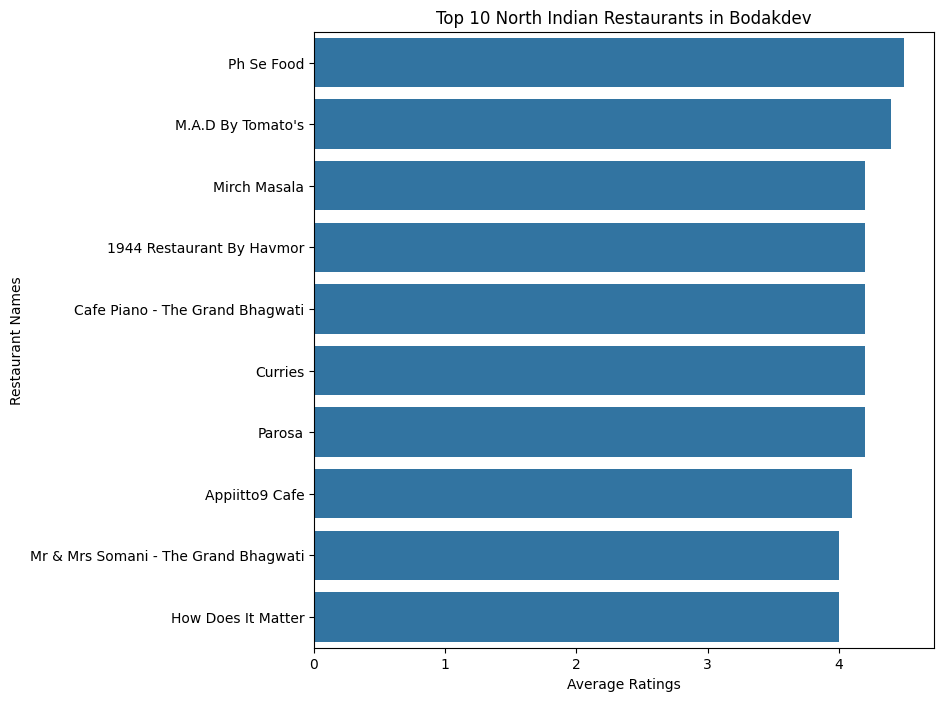

In [71]:
BestRestaurantsLocal(Ahmedabad,'Bodakdev','North Indian')

# Top Fast Food Restaurants in Satellite

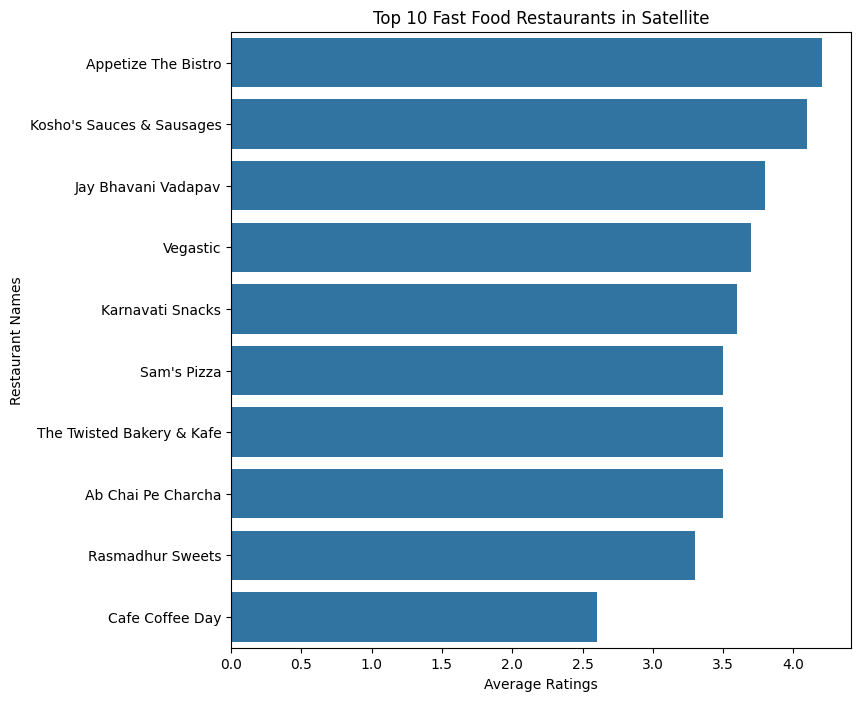

In [72]:
BestRestaurantsLocal(Ahmedabad,'Satellite','Fast Food')